In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

In [3]:
train = pd.read_csv('/Users/skylark/Desktop/sales prediction/train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test = pd.read_csv('/Users/skylark/Desktop/sales prediction/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
age = {}
for i,j in enumerate(sorted(list(train.Age.unique()))):
    age[j] = i

In [8]:
train_data = train.copy()

In [9]:
train_data['Age'] = train_data.Age.apply(lambda x: age[x])

In [10]:
test_data = test.copy()

In [11]:
test_data['Age'] = test_data.Age.apply(lambda x: age[x])

In [12]:
train_data=pd.get_dummies(train_data, columns=['Gender'], drop_first=True)

In [13]:
test_data=pd.get_dummies(test_data, columns=['Gender'], drop_first=True)

In [14]:
train_data=pd.get_dummies(train_data, columns=['City_Category'], drop_first=True)

In [15]:
test_data=pd.get_dummies(test_data, columns=['City_Category'], drop_first=True)

In [16]:
train_data.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [17]:
train_data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
train_data.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [19]:
np.round(train_data.Product_Category_2.mean()), train_data.Product_Category_2.median(), train_data.Product_Category_2.mode()

(10.0, 9.0, 0    8.0
 dtype: float64)

In [20]:
np.round(test_data.Product_Category_2.mean()), test_data.Product_Category_2.median(), test_data.Product_Category_2.mode()

(10.0, 9.0, 0    8.0
 dtype: float64)

In [63]:
np.round(train_data.Product_Category_3.mean()), train_data.Product_Category_3.median(), train_data.Product_Category_3.mode()

(13.0, 14.0, 0    16.0
 dtype: float64)

In [81]:
np.round(test_data.Product_Category_3.mean()), test_data.Product_Category_3.median(), test_data.Product_Category_3.mode()

(13.0, 14.0, 0    16.0
 dtype: float64)

In [21]:
train_data.Product_Category_2.fillna(train_data.Product_Category_2.median(), inplace=True)

In [22]:
test_data.Product_Category_2.fillna(test_data.Product_Category_2.median(), inplace=True)

In [23]:
train_data.Product_Category_3.fillna(train_data.Product_Category_3.median(), inplace=True)

In [24]:
test_data.Product_Category_3.fillna(test_data.Product_Category_3.median(), inplace=True)

In [34]:
train_data.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [32]:
test_data.Stay_In_Current_City_Years.unique()

array([2, 0, 4, 1, 3])

In [27]:
train_data.Stay_In_Current_City_Years.replace('4+', '4', inplace=True)

In [28]:
test_data.Stay_In_Current_City_Years.replace('4+', '4', inplace=True)

In [33]:
train_data.Stay_In_Current_City_Years = pd.to_numeric(train_data.Stay_In_Current_City_Years)

In [ ]:
test_data.Stay_In_Current_City_Years = pd.to_numeric(test_data.Stay_In_Current_City_Years)

In [35]:
x = train_data.drop(['Purchase','User_ID','Product_ID'], axis=1)

In [36]:
x.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C
0,0,10,2,0,3,9.0,14.0,0,0,0
1,0,10,2,0,1,6.0,14.0,0,0,0
2,0,10,2,0,12,9.0,14.0,0,0,0
3,0,10,2,0,12,14.0,14.0,0,0,0
4,6,16,4,0,8,9.0,14.0,1,0,1


In [37]:
y = train_data.Purchase

In [38]:
def normalise(data):
    return ((data - data.mean())/data.std())

In [39]:
x[['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = normalise(x[['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])

In [100]:
def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

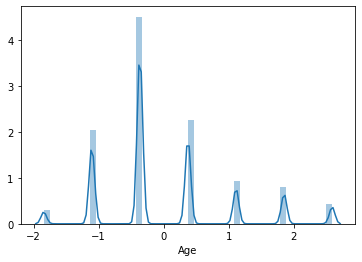

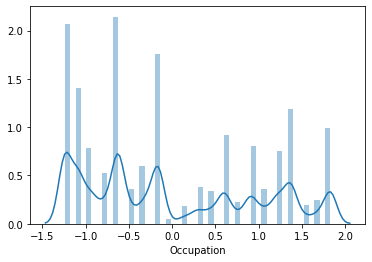

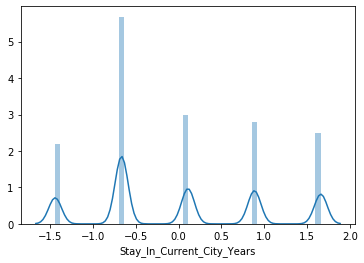

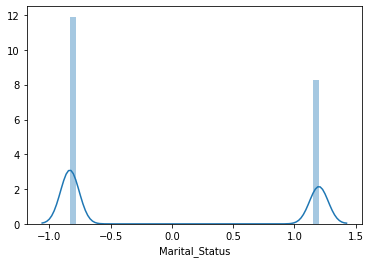

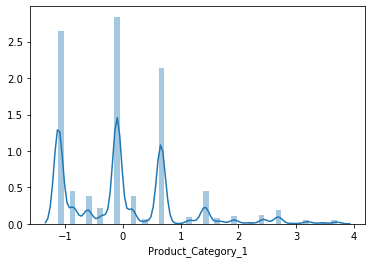

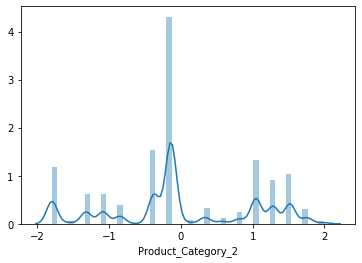

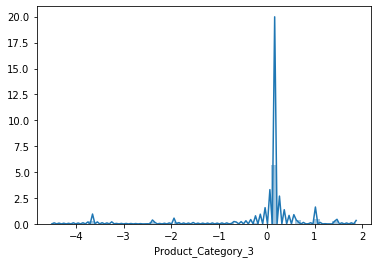

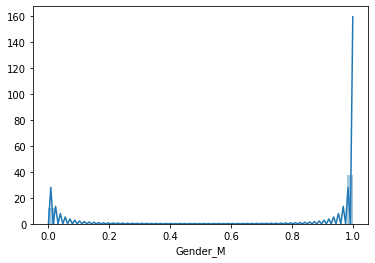

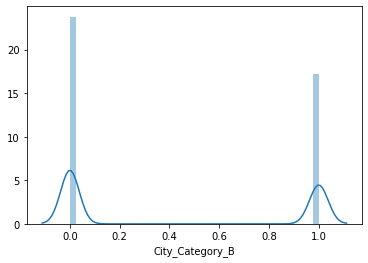

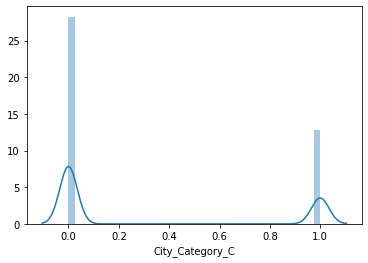

In [122]:
for i in x.columns:
    plt.figure()
    sn.distplot(x[i])

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, SCORERS

In [45]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=100)

In [48]:
train_y_log = np.log(train_y)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_mod = LinearRegression()

In [51]:
lr_mod.fit(train_x, train_y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
np.exp(lr_mod.predict(test_x))

array([ 4754.8973514 ,  8894.98349955,  7567.92800279, ...,
       10596.57055808,  3352.79808631,  7983.56965632])

In [60]:
cv = cross_val_score(lr_mod, train_x, train_y_log, scoring='r2', cv=5)

In [62]:
r2_score(test_y, np.exp(lr_mod.predict(test_x)))

0.10325408088253973

In [63]:
r2_score(train_y, np.exp(lr_mod.predict(train_x)))

0.10495115591449

In [64]:
np.sqrt(mean_squared_error(test_y, np.exp(lr_mod.predict(test_x)))), np.sqrt(mean_squared_error(train_y, np.exp(lr_mod.predict(train_x))))

(4762.369618752426, 4749.705593813564)

### Lasso

In [65]:
from sklearn.linear_model import Lasso

In [76]:
lasso = Lasso(0.01)

In [77]:
lasso.fit(train_x, train_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
lasso.predict(test_x)

array([ 6766.60991391, 10189.14905854,  8622.59481292, ...,
       11153.66171305,  4690.69490443,  9535.73079804])

In [79]:
np.sqrt(mean_squared_error(test_y, lasso.predict(test_x))), np.sqrt(mean_squared_error(train_y, lasso.predict(train_x)))

(4703.914780135085, 4688.884216776951)

### Ridge

In [75]:
from sklearn.linear_model import Ridge

In [93]:
ridge = Ridge(alpha=0.001, max_iter=1000)

In [94]:
ridge.fit(train_x, train_y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
ridge.predict(test_x)

array([ 6766.51514361, 10189.07115626,  8622.56795262, ...,
       11153.71739655,  4690.65931828,  9535.76869415])

### Elasticnet

In [92]:
from sklearn.linear_model import ElasticNet

In [96]:
elast = ElasticNet(alpha=1.01)

In [97]:
elast.fit(train_x, train_y)

ElasticNet(alpha=1.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
elast.predict(test_x)

array([ 7705.06170408, 10545.01501969,  8804.03732569, ...,
       10551.93917605,  6093.36755278,  9454.6412086 ])

In [101]:
rmse(test_y, elast.predict(test_x))

4741.385904419762

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rdm_mod = RandomForestRegressor(n_estimators=20, max_features=0.5, max_depth=15)

In [130]:
rdm_mod.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [131]:
rmse(test_y, rdm_mod.predict(test_x))

2928.065596760658

In [133]:
test_data[['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = normalise(test_data[['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])

In [135]:
test_data_normal = test_data.drop(['User_ID','Product_ID'], axis=1)

In [145]:
test_data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C
0,1000004,P00128942,1.112314,-0.166444,0.110432,1.199417,-1.144568,0.332492,0.171729,1,1,0
1,1000009,P00113442,-0.368479,1.367028,-1.443261,-0.833735,-0.609291,-1.078840,0.171729,1,0,1
2,1000010,P00288442,0.371918,-1.086528,1.664124,1.199417,-0.074013,1.038158,0.171729,0,1,0
3,1000010,P00145342,0.371918,-1.086528,1.664124,1.199417,-0.341652,-0.137952,0.171729,0,1,0
4,1000011,P00053842,-0.368479,-1.086528,-0.666414,-0.833735,-0.341652,-1.078840,-0.677118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,-0.368479,1.060334,1.664124,1.199417,0.728903,-0.137952,0.171729,0,1,0
233595,1006036,P00254642,-0.368479,1.060334,1.664124,1.199417,-0.074013,-0.373174,0.171729,0,1,0
233596,1006036,P00031842,-0.368479,1.060334,1.664124,1.199417,-1.144568,-1.078840,-0.677118,0,1,0
233597,1006037,P00124742,1.112314,-1.086528,1.664124,-0.833735,1.264180,1.508603,0.171729,0,0,1


In [137]:
res = rdm_mod.predict(test_data_normal)

In [143]:
result = pd.DataFrame(np.round(res), columns=['Purchase'])

In [152]:
result.set_index('Purchase').to_csv('/Users/skylark/Desktop/sales prediction/result.csv')

In [113]:
from sklearn.model_selection import GridSearchCV

In [122]:
params = {'n_estimators': [5, 10, 15, 20],
         'max_depth': [5, 10, 15, 20],
         'max_features': ['auto', 'sqrt', 0.2, 0.5],}

In [125]:
gcv = GridSearchCV(rdm_mod, param_grid=params, scoring='r2', cv=5)

In [126]:
gcv.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20],
     

In [127]:
gcv.best_params_

{'max_depth': 15, 'max_features': 0.5, 'n_estimators': 20}

In [128]:
gcv.best_score_

0.6615723629476108

### Polynomial Features

In [102]:
x

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C
0,-1.844246,0.294863,0.109801,-0.833017,-0.610808,-0.136401,0.171657,0,0,0
1,-1.844246,0.294863,0.109801,-0.833017,-1.118911,-0.846288,0.171657,0,0,0
2,-1.844246,0.294863,0.109801,-0.833017,1.675654,-0.136401,0.171657,0,0,0
3,-1.844246,0.294863,0.109801,-0.833017,1.675654,1.046744,0.171657,0,0,0
4,2.588275,1.214733,1.660859,-0.833017,0.659449,-0.136401,0.171657,1,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1.849521,0.754798,-0.665728,1.200453,3.708066,-0.136401,0.171657,1,1,0
550064,-0.366739,-1.084942,0.885330,-0.833017,3.708066,-0.136401,0.171657,0,0,1
550065,-0.366739,1.061422,1.660859,1.200453,3.708066,-0.136401,0.171657,0,1,0
550066,2.588275,-1.084942,0.109801,-0.833017,3.708066,-0.136401,0.171657,0,0,1


In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
ploy_feat = PolynomialFeatures(degree=2)

In [106]:
poly_x = ploy_feat.fit_transform(x)

In [155]:
poly_mod = LinearRegression()

In [154]:
train_x_poly, test_x_poly, train_y, test_y = train_test_split(poly_x, y, test_size=0.3, random_state=100)

In [156]:
poly_mod.fit(train_x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
rmse(test_y, poly_mod.predict(test_x_poly))

4434.210350481964

### XGBoost

In [158]:
from xgboost import XGBRegressor

In [170]:
xg_mod = XGBRegressor(n_estimators=50, max_depth=10, learning_rate=0.1)

In [171]:
xg_mod.fit(train_x, train_y)

[17:53:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [172]:
rmse(test_y, xg_mod.predict(test_x))

2897.9862097288096

In [173]:
xg_res = xg_mod.predict(test_data_normal)

In [174]:
xg_result = pd.DataFrame(np.round(xg_res), columns=['Purchase'])

In [177]:
xg_result['User_ID'] = test_data.User_ID
xg_result['Product_ID'] = test_data.Product_ID

In [179]:
xg_result.set_index('Purchase').to_csv('/Users/skylark/Desktop/sales prediction/result.csv')

In [164]:
params = {'max_depth':range(1,20),
         'learning_rate':[0.001, 0.01, 0.1,1],
         'n_estimators':[50,100,150,200]}

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
rcv = RandomizedSearchCV(xg_mod, param_distributions=params, cv=5, scoring='r2')

In [167]:
rcv.fit(train_x, train_y)

[15:51:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                  

In [168]:
rcv.best_params_

{'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}

In [169]:
rcv.best_score_

0.6686980213916147

In [180]:
from keras import models, layers, optimizers, regularizers

Using TensorFlow backend.


In [199]:
nn_mod = models.Sequential()
nn_mod.add(layers.Dense(32, activation='relu', input_shape=(10,)))
nn_mod.add(layers.Dense(64, activation='relu'))
nn_mod.add(layers.Dense(128, activation='relu'))
nn_mod.add(layers.Dense(256, activation='relu'))
nn_mod.add(layers.Dense(1))
nn_mod.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 44,065
Trainable params: 44,065
Non-trainable params: 0
_________________________________________________________________


In [200]:
nn_mod.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='mse', metrics=['acc'])

In [201]:
history = nn_mod.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.3)

Train on 269532 samples, validate on 115515 samples
Epoch 1/20
269532/269532 [==============================] - 7s 26us/step - loss: 40745347.6644 - acc: 5.9362e-05 - val_loss: 20143291.3652 - val_acc: 1.2120e-04
Epoch 2/20
269532/269532 [==============================] - 7s 24us/step - loss: 19499688.9010 - acc: 1.1501e-04 - val_loss: 19342433.2694 - val_acc: 7.7912e-05
Epoch 3/20
269532/269532 [==============================] - 7s 25us/step - loss: 18993402.0787 - acc: 6.6782e-05 - val_loss: 19045007.9100 - val_acc: 7.7912e-05
Epoch 4/20
269532/269532 [==============================] - 7s 25us/step - loss: 18734626.0942 - acc: 8.5333e-05 - val_loss: 18793162.0175 - val_acc: 1.2120e-04
Epoch 5/20
269532/269532 [==============================] - 7s 25us/step - loss: 18403676.7267 - acc: 1.1130e-04 - val_loss: 18417658.4985 - val_acc: 1.1254e-04
Epoch 6/20
269532/269532 [==============================] - 7s 25us/step - loss: 18130346.7512 - acc: 8.9043e-05 - val_loss: 18197759.8329 - va

In [202]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [203]:
val_loss = np.sqrt(history.history['val_loss'])
loss = np.sqrt(history.history['loss'])

val_acc = np.sqrt(history.history['val_acc'])
acc = np.sqrt(history.history['acc'])

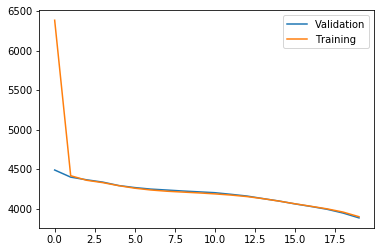

In [204]:
plt.plot(range(len(loss)), val_loss, label = 'Validation')
plt.plot(range(len(loss)), loss, label = 'Training')
plt.legend()
plt.show()

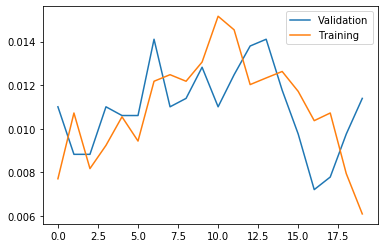

In [205]:
plt.plot(range(len(loss)), val_acc, label = 'Validation')
plt.plot(range(len(loss)), acc, label = 'Training')
plt.legend()
plt.show()

In [208]:
np.mean(loss)

4278.302188800577

### Boosting

In [223]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [219]:
ada_mod = AdaBoostRegressor(XGBRegressor(), n_estimators=20)

In [221]:
ada_mod.fit(train_x, train_y)

[19:45:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              importance_type='gain',
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='reg:linear',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, sile

In [222]:
rmse(test_y, ada_mod.predict(test_x))

3033.368444266829

### Gradient Boosting

In [236]:
grd_mod = GradientBoostingRegressor(n_estimators=400)

In [237]:
grd_mod.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [238]:
rmse(test_y, grd_mod.predict(test_x))

2946.873543962712

In [239]:
grd_res = grd_mod.predict(test_data_normal)
grd_result = pd.DataFrame(np.round(grd_res), columns=['Purchase'])
grd_result['User_ID'] = test_data.User_ID
grd_result['Product_ID'] = test_data.Product_ID

In [241]:
grd_result.set_index('Purchase').to_csv('/Users/skylark/Desktop/sales prediction/result.csv')